# Week 3 - Machine learning

## Introduction

In [2]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #We need this to split the data

In [3]:
df = pd.read_csv("CompleteDataset.csv")
df.head(30) #show a bit more of the dataset

C:\Users\guusv\AppData\Local\Temp\ipykernel_33880\3258759003.py:1: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CompleteDataset.csv")


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,9,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


## Data cleaning

In [4]:
df = df[['Preferred Positions','CAM','CB', 'CDM', 'CF', 'CM', 'LB','LF','LM', 'ST', 'LWB', 'RB', 'RF', 'RWB', 'RW','Acceleration','Aggression','Agility','Balance','Ball control','Composure','Crossing','Curve','Dribbling','Finishing','Free kick accuracy','GK diving','GK handling',	'GK kicking','GK positioning','GK reflexes','Heading accuracy',	'Interceptions','Jumping','Long passing','Long shots','Marking','Penalties','Positioning','Reactions','Short passing','Shot power','Sliding tackle','Sprint speed',	'Stamina','Standing tackle','Strength','Vision','Volleys']]
#Dit zijn alle variabelen die ik wil gebruiken voor mijn voorspelling
df['Preferred Positions']=df['Preferred Positions'].str.split(' ').str[0]
print(df.head())
#Hier zorg ik ervoor dat er maar één voorkeurspositie van de speler is en niet twee zoals bij somige spelers.
df[['CAM','CB', 'CDM', 'CF', 'CM', 'LB','LF','LM', 'ST', 'LWB', 'RB', 'RF', 'RWB', 'RW','Acceleration','Aggression','Agility','Balance','Ball control','Composure','Crossing','Curve','Dribbling','Finishing','Free kick accuracy','GK diving','GK handling',	'GK kicking','GK positioning','GK reflexes','Heading accuracy',	'Interceptions','Jumping','Long passing','Long shots','Marking','Penalties','Positioning','Reactions','Short passing','Shot power','Sliding tackle','Sprint speed',	'Stamina','Standing tackle','Strength','Vision','Volleys']] = df[['CAM','CB', 'CDM', 'CF', 'CM', 'LB','LF','LM', 'ST', 'LWB', 'RB', 'RF', 'RWB', 'RW','Acceleration','Aggression','Agility','Balance','Ball control','Composure','Crossing','Curve','Dribbling','Finishing','Free kick accuracy','GK diving','GK handling',	'GK kicking','GK positioning','GK reflexes','Heading accuracy',	'Interceptions','Jumping','Long passing','Long shots','Marking','Penalties','Positioning','Reactions','Short passing','Shot power','Sliding tackle','Sprint speed',	'Stamina','Standing tackle','Strength','Vision','Volleys']].apply(pd.to_numeric, errors='coerce', axis=1)
#Hier worden alle waarden nummeric gemaakt zodat er mee gerekend kan worden.
df = df.dropna()
#Hier worden alle spelers waarvan sommige velden leeg zijn gedropt (dit zijn eigenlijk alleen maar keepers)

  Preferred Positions   CAM    CB   CDM    CF    CM    LB    LF    LM    ST  \
0                  ST  89.0  53.0  62.0  91.0  82.0  61.0  91.0  89.0  92.0   
1                  RW  92.0  45.0  59.0  92.0  84.0  57.0  92.0  90.0  88.0   
2                  LW  88.0  46.0  59.0  88.0  79.0  59.0  88.0  87.0  84.0   
3                  ST  87.0  58.0  65.0  88.0  80.0  64.0  88.0  85.0  88.0   
4                  GK   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   ...  Reactions  Short passing  Shot power  Sliding tackle  Sprint speed  \
0  ...         96             83          94              23            91   
1  ...         95             88          85              26            87   
2  ...         88             81          80              33            90   
3  ...         93             83          87              38            77   
4  ...         85             55          25              11            61   

  Stamina Standing tackle Strength Vision Volleys  
0   

## Exploratory data analysis

Text(0, 0.5, 'Algemene beoordeling')

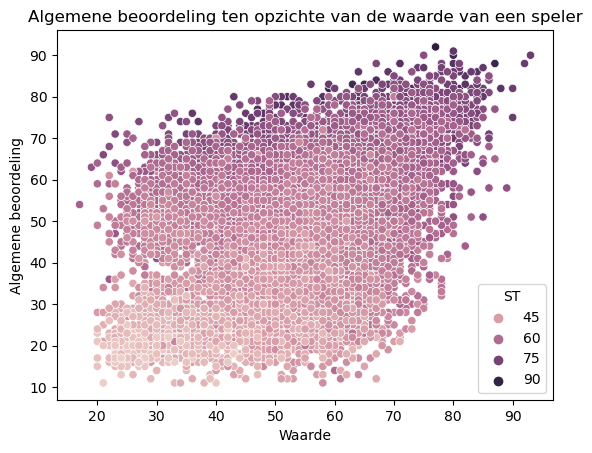

In [5]:
sns.scatterplot(data=df, x='Long passing', y='Long shots', hue='ST')
plt.title('Algemene beoordeling ten opzichte van de waarde van een speler')
plt.xlabel('Waarde')
plt.ylabel('Algemene beoordeling')

Text(0, 0.5, 'Algemene beoordeling')

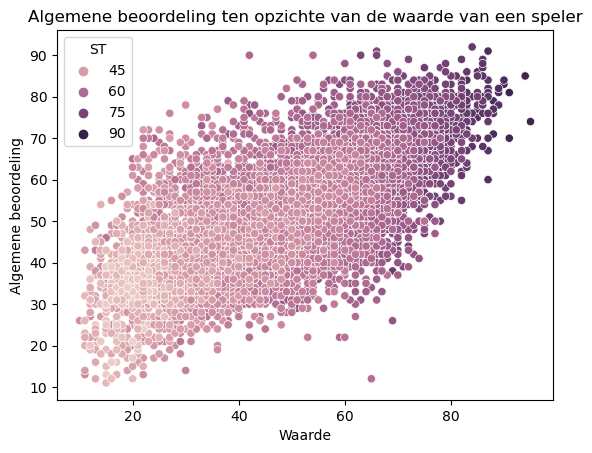

In [6]:
sns.scatterplot(data=df, x='Finishing', y='Penalties', hue='ST')
plt.title('Algemene beoordeling ten opzichte van de waarde van een speler')
plt.xlabel('Waarde')
plt.ylabel('Algemene beoordeling')

Text(0, 0.5, 'Functioneren RW')

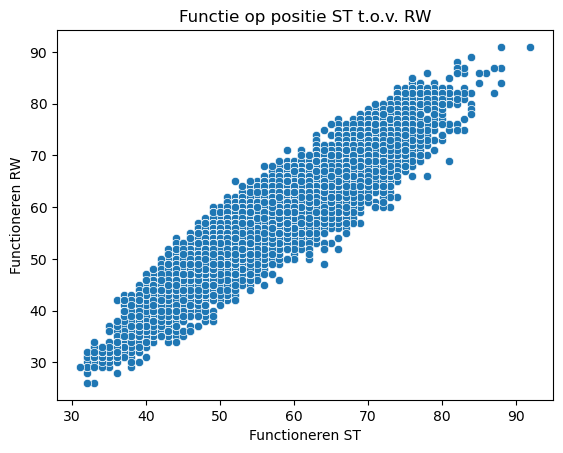

In [7]:
sns.scatterplot(data=df, x='ST', y='RW')
plt.title('Functie op positie ST t.o.v. RW')
plt.xlabel('Functioneren ST')
plt.ylabel('Functioneren RW')

## Predictive model



In [8]:
X = df[['Acceleration','Aggression','Agility','Balance','Ball control','Composure','Crossing','Curve','Dribbling','Finishing','Free kick accuracy','GK diving','GK handling',	'GK kicking','GK positioning','GK reflexes','Heading accuracy',	'Interceptions','Jumping','Long passing','Long shots','Marking','Penalties','Positioning','Reactions','Short passing','Shot power','Sliding tackle','Sprint speed',	'Stamina','Standing tackle','Strength','Vision','Volleys']] #create the X matrix

y = df['Preferred Positions'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) #split the data, store it into different variables

X_train.head() #show the head of the training set

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
17921,61.0,54.0,63.0,74.0,43.0,48.0,40.0,39.0,40.0,29.0,...,52.0,55.0,46.0,51.0,60.0,76.0,45.0,55.0,41.0,27.0
7591,62.0,45.0,39.0,48.0,68.0,69.0,58.0,65.0,69.0,69.0,...,67.0,62.0,75.0,20.0,70.0,70.0,23.0,85.0,62.0,61.0
5228,77.0,63.0,71.0,76.0,70.0,65.0,55.0,61.0,71.0,72.0,...,70.0,66.0,70.0,33.0,75.0,69.0,37.0,65.0,65.0,72.0
14716,69.0,59.0,75.0,73.0,65.0,50.0,55.0,55.0,63.0,53.0,...,46.0,65.0,64.0,57.0,71.0,68.0,58.0,58.0,60.0,37.0
13968,69.0,64.0,71.0,71.0,66.0,60.0,60.0,48.0,61.0,43.0,...,62.0,66.0,48.0,64.0,70.0,67.0,61.0,62.0,45.0,28.0


In [9]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier() #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data



Bij de k-nearest neighbor gaat hij punten maken waar de waarden het dichtstebij liggen. Dus als jij opgeeft dat er 3 clusers moeten komen gaat die opzoek naar 3 punten waar alle punten samen de minste grote afstand moeten maken om tot één van de drie punten te komen. 

## Evaluation


In [10]:
knn.score(X_test, y_test) #calculate the fit on the *test* data

0.4348958333333333

Er is niet sprake van een hele goede voorspelling met een nauwkeurigheid van 43%.

Ik weet niet goed hoe ik nu de precision en recall kan berekenen want bij mij heeft die niet 2 bij 2 maar 14 bij 14 en snap niet waarom. 

## Conclusion


Ik vond dat hij het aardig goed kon voorspellen met de data als; conditie, sterkte en afmaken maar toen wij het functioneren van de speler op de positie toevoegden werd het model haast niet beter. Wat raar is want zelfs een mens kan dan heel gemakkelijk zien wat de positie zou moeten zijn. Dus dat was wel opmerkelijk en kan niet helemaal verklaren waarom dat was. 